In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

In [2]:
df_ghg = pd.read_csv("./Data/UK_LA_GHG_EMISSIONS.csv")
df_popdensity = pd.read_csv("./Data/PopulationDensityLA.csv", skiprows=7)

In [3]:
df_merged = df_ghg.merge(df_popdensity, how="inner", left_on="Local Authority Code", right_on="mnemonic")
df_merged.rename(columns={"2021": "Census Population Density"}, inplace=True)
df_merged.drop(columns=["2022 local authorities: district", "mnemonic"], inplace=True)
df_merged

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2e),Mid-year Population (thousands),Area (km2),Census Population Density
0,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,CH4,0.010737,0.000000,236.470,78.0311,3349.5
1,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,CO2,0.380289,0.380289,236.470,78.0311,3349.5
2,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,N2O,0.001710,0.000000,236.470,78.0311,3349.5
3,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Gas,CH4,0.021121,0.000000,236.470,78.0311,3349.5
4,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Gas,CO2,0.700438,0.700438,236.470,78.0311,3349.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413737,Wales,W92000004,Wales,W92000004,Wales,Wrexham,W06000006,2020,Transport,Transport 'Other',N2O,0.107471,0.000000,136.055,503.7739,268.2
413738,Wales,W92000004,Wales,W92000004,Wales,Wrexham,W06000006,2020,Waste management,Landfill,CH4,29.169887,0.000000,136.055,503.7739,268.2
413739,Wales,W92000004,Wales,W92000004,Wales,Wrexham,W06000006,2020,Waste management,Waste management 'Other',CH4,7.526841,0.000000,136.055,503.7739,268.2
413740,Wales,W92000004,Wales,W92000004,Wales,Wrexham,W06000006,2020,Waste management,Waste management 'Other',CO2,4.985691,4.985691,136.055,503.7739,268.2


In [4]:
boolean_mask1 = (df_merged["LA GHG Sector"] == "Transport")
boolean_mask2 = (df_merged["LA GHG Sub-sector"] == "Road Transport (A roads)")
boolean_mask3 = (df_merged["Greenhouse gas"] == "CO2")

df_merged = df_merged[boolean_mask1 & boolean_mask2 & boolean_mask3]
df_merged.reset_index(inplace=True)

In [5]:
year_condition = (df_merged["Calendar Year"] == 2018)

df_merged_2018 = df_merged[year_condition]
df_merged_2018.reset_index(inplace=True)

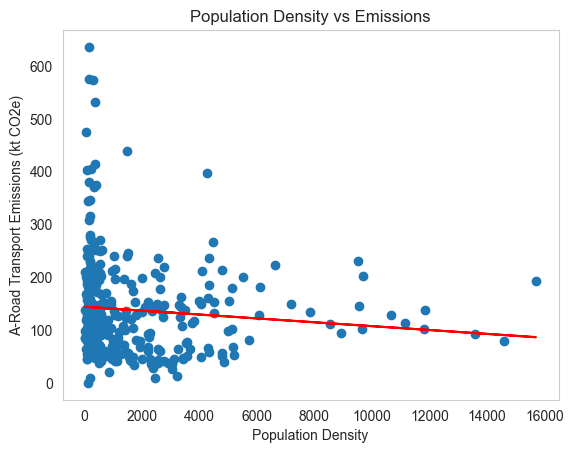

In [10]:
plt.scatter(list(df_merged_2018["Census Population Density"]), list(df_merged_2018["Territorial emissions (kt CO2e)"]))

#TRENDLINE
z = np.polyfit(list(df_merged_2018["Census Population Density"]), list(df_merged_2018["Territorial emissions (kt CO2e)"]), 1)
p = np.poly1d(z)
plt.plot(list(df_merged_2018["Census Population Density"]),p(list(df_merged_2018["Census Population Density"])),"r")

plt.xlabel("Population Density")
plt.ylabel("A-Road Transport Emissions (kt CO2e)")
plt.title("Population Density vs Emissions")
plt.grid(False)
plt.show()

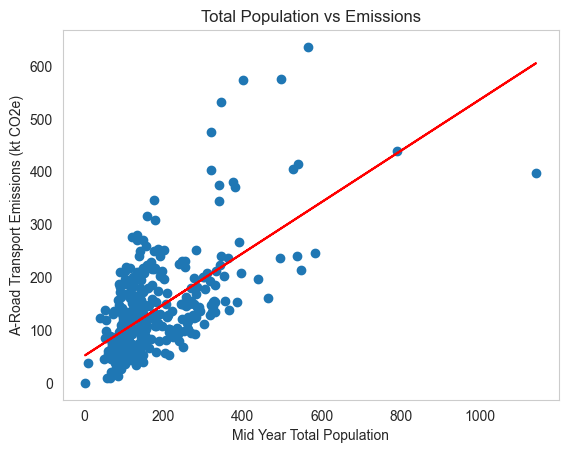

In [11]:
plt.scatter(list(df_merged_2018["Mid-year Population (thousands)"]), list(df_merged_2018["Territorial emissions (kt CO2e)"]))

#TRENDLINE
z = np.polyfit(list(df_merged_2018["Mid-year Population (thousands)"]), list(df_merged_2018["Territorial emissions (kt CO2e)"]), 1)
p = np.poly1d(z)
plt.plot(list(df_merged_2018["Mid-year Population (thousands)"]),p(list(df_merged_2018["Mid-year Population (thousands)"])),"r")

plt.xlabel("Mid Year Total Population")
plt.ylabel("A-Road Transport Emissions (kt CO2e)")
plt.title("Total Population vs Emissions")
plt.grid(False)
plt.show()

In [12]:
#REMOVE CORE CITIES HERE
percent_threshold = 0.6
city_types = ["Core City (London)", "Core City (outside London)", "Other City"]
df_cities = pd.read_csv("./../01_LocalAuthorities/lauth-classification-csv.csv")
df_cities.drop(df_cities[~df_cities["classification"].isin(city_types)].index, inplace=True)
df_cities = df_cities.groupby(["localauth_code"])["percent_of_localauth"].sum()

df_cities = df_cities[df_cities > percent_threshold]
df_merged_2018_nocities = df_merged_2018[~df_merged_2018["Local Authority Code"].isin(list(df_cities.keys()))]
df_merged_2018_nocities.reset_index(inplace=True, drop=True)

In [13]:
scipy.stats.pearsonr(list(df_merged_2018["Census Population Density"]), list(df_merged_2018["Territorial emissions (kt CO2e)"]))

PearsonRResult(statistic=-0.09728190830486065, pvalue=0.07716329145279328)

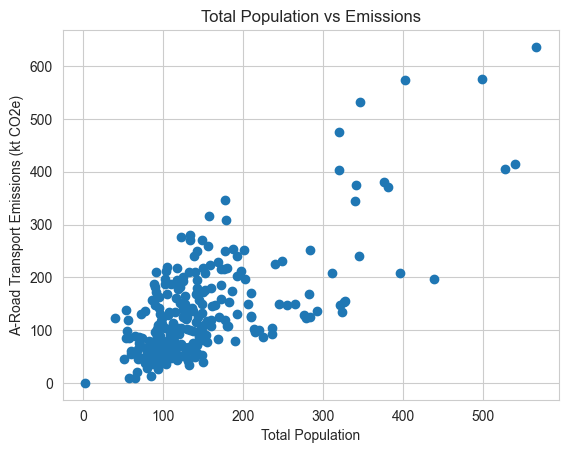

In [21]:
plt.scatter(list(df_merged_2018_nocities["Mid-year Population (thousands)"]), list(df_merged_2018_nocities["Territorial emissions (kt CO2e)"]))

#TRENDLINE
z = np.polyfit(list(df_merged_2018["Census Population Density"]), list(df_merged_2018["Territorial emissions (kt CO2e)"]), 1)
p = np.poly1d(z)
plt.plot(list(df_merged_2018["Census Population Density"]),p(list(df_merged_2018["Census Population Density"])),"r")

plt.xlabel("Total Population")
plt.ylabel("A-Road Transport Emissions (kt CO2e)")
plt.title("Total Population vs Emissions")
plt.show()

In [15]:
scipy.stats.pearsonr(list(df_merged_2018_nocities["Mid-year Population (thousands)"]), list(df_merged_2018_nocities["Territorial emissions (kt CO2e)"]))
scipy.stats.pearsonr(list(df_merged_2018["Mid-year Population (thousands)"]), list(df_merged_2018["Territorial emissions (kt CO2e)"]))

PearsonRResult(statistic=0.7088757450741986, pvalue=3.234830343368618e-42)

In [23]:
df_merged_2018_nocities[df_merged_2018_nocities["Territorial emissions (kt CO2e)"] > 300]

,level_0,index,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2e),Mid-year Population (thousands),Area (km2),Census Population Density
22,397,30817,England,E92000001,East Midlands,E12000004,Northamptonshire,North Northamptonshire,E06000061,2018,Transport,Road Transport (A roads),CO2,531.476648,531.476648,345.477,986.5947,364.4
23,413,32060,England,E92000001,East Midlands,E12000004,Northamptonshire,West Northamptonshire,E06000062,2018,Transport,Road Transport (A roads),CO2,574.286060,574.286060,402.145,1380.3956,309.1
37,653,50944,England,E92000001,East of England,E12000006,Cambridgeshire,Huntingdonshire,E07000011,2018,Transport,Road Transport (A roads),CO2,347.182116,347.182116,177.352,912.5461,199.6
38,669,52252,England,E92000001,East of England,E12000006,Cambridgeshire,South Cambridgeshire,E07000012,2018,Transport,Road Transport (A roads),CO2,316.897252,316.897252,157.519,901.6873,179.8
72,1261,97835,England,E92000001,East of England,E12000006,Suffolk,West Suffolk,E07000245,2018,Transport,Road Transport (A roads),CO2,308.005982,308.005982,178.881,1034.6756,173.9
75,1837,141313,England,E92000001,North East,E12000001,Durham,County Durham,E06000047,2018,Transport,Road Transport (A roads),CO2,405.120281,405.120281,526.980,2232.6115,234.5
79,1933,148794,England,E92000001,North East,E12000001,Northumberland,Northumberland,E06000057,2018,Transport,Road Transport (A roads),CO2,474.414561,474.414561,320.274,5077.4757,63.9
86,2077,160263,England,E92000001,North West,E12000002,Cheshire,Cheshire East,E06000049,2018,Transport,Road Transport (A roads),CO2,370.119431,370.119431,380.790,1166.3577,341.9
87,2093,161600,England,E92000001,North West,E12000002,Cheshire,Cheshire West and Chester,E06000050,2018,Transport,Road Transport (A roads),CO2,374.413851,374.413851,340.502,941.2070,388.2
120,2669,208179,England,E92000001,South East,E12000008,Buckinghamshire,Buckinghamshire,E06000060,2018,Transport,Road Transport (A roads),CO2,415.050392,415.050392,540.059,1564.9380,353.4
